In [1]:
import pandas as pd
df=pd.read_csv('emails.csv',encoding='latin-1')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [2]:
from Preprocessor import preprocess
df['cleaned_msg']=df['text'].apply(preprocess)
df.head()

,text,spam,cleaned_msg
0,Subject: naturally irresistible your corporate...,1,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,subject money get softwar cd softwar compat gr...


In [3]:
df.shape

(5728, 3)

In [4]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         5728 non-null   object
 1   spam         5728 non-null   int64 
 2   cleaned_msg  5728 non-null   object
dtypes: int64(1), object(2)
memory usage: 134.4+ KB


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x=vectorizer.fit_transform(df['cleaned_msg']).toarray()
y=df['spam']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import numpy as np

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from scipy.sparse import csr_matrix
X_train_sparse = csr_matrix(X_train)
#By using Naive Bayes Algo
nb_model=MultinomialNB(alpha=0.3)
nb_model.fit(X_train_sparse, y_train)
nb_pred=nb_model.predict(X_test)
nb_accuracy=accuracy_score(y_test,nb_pred)
nb_report=classification_report(y_test, nb_pred, zero_division=1)
print("Naive Bayes Accuracy",nb_accuracy*100,"%")
print("\nClassification Report\n",nb_report )

#By using Logistic Regression
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)
lr_accuracy=accuracy_score(y_test,lr_pred)
lr_report=classification_report(y_test, nb_pred, zero_division=1)
print("Logistic Regression Accuracy",lr_accuracy*100,"%")
print("\nClassification Report\n",lr_report)

from sklearn.ensemble import RandomForestClassifier

# By using Random Forest Algorithm
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred, zero_division=1)

print("Random Forest Accuracy", rf_accuracy * 100, "%")
print("\nClassification Report\n", rf_report)


Naive Bayes Accuracy 97.12041884816755 %

Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       856
           1       1.00      0.89      0.94       290

    accuracy                           0.97      1146
   macro avg       0.98      0.94      0.96      1146
weighted avg       0.97      0.97      0.97      1146

Logistic Regression Accuracy 97.55671902268762 %

Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       856
           1       1.00      0.89      0.94       290

    accuracy                           0.97      1146
   macro avg       0.98      0.94      0.96      1146
weighted avg       0.97      0.97      0.97      1146

Random Forest Accuracy 97.12041884816755 %

Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       856
           1       1.00      0.8

In [9]:
from sklearn.model_selection import cross_val_score
# Add cross-validation to check for overfitting
def check_overfitting(X, y, model):
    train_score = model.score(X_train, y_train)
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Training Score: {train_score:.4f}")
    print(f"CV Scores: {cv_scores}")
    print(f"CV Average: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

    # Check for overfitting
    if train_score - cv_scores.mean() > 0.1:  # 10% difference threshold
        print("\nWarning: Model might be overfitting!")
    else:
        print("\nModel is well trained and it isn't overfitting!")


check_overfitting(X_train,y_train,nb_model)
check_overfitting(X_test,y_test,lr_model)
check_overfitting(X_train,y_train,rf_model)


Training Score: 0.9911
CV Scores: [0.96401309 0.95965104 0.96834061 0.95742358 0.9650655 ]
CV Average: 0.9629 (+/- 0.0078)

Model is well trained and it isn't overfitting!
Training Score: 0.9969
CV Scores: [0.90869565 0.90393013 0.90393013 0.89519651 0.91703057]
CV Average: 0.9058 (+/- 0.0143)

Model is well trained and it isn't overfitting!
Training Score: 1.0000
CV Scores: [0.97600872 0.97928026 0.97816594 0.97379913 0.97161572]
CV Average: 0.9758 (+/- 0.0056)

Model is well trained and it isn't overfitting!


Email Distribution:  0    4360
1    1368
Name: spam, dtype: int64

Confidence Distribution: 0-0.2      3296
0.2-0.4     199
0.4-0.6      79
0.6-0.8     372
0.8-1.0     636
dtype: int64


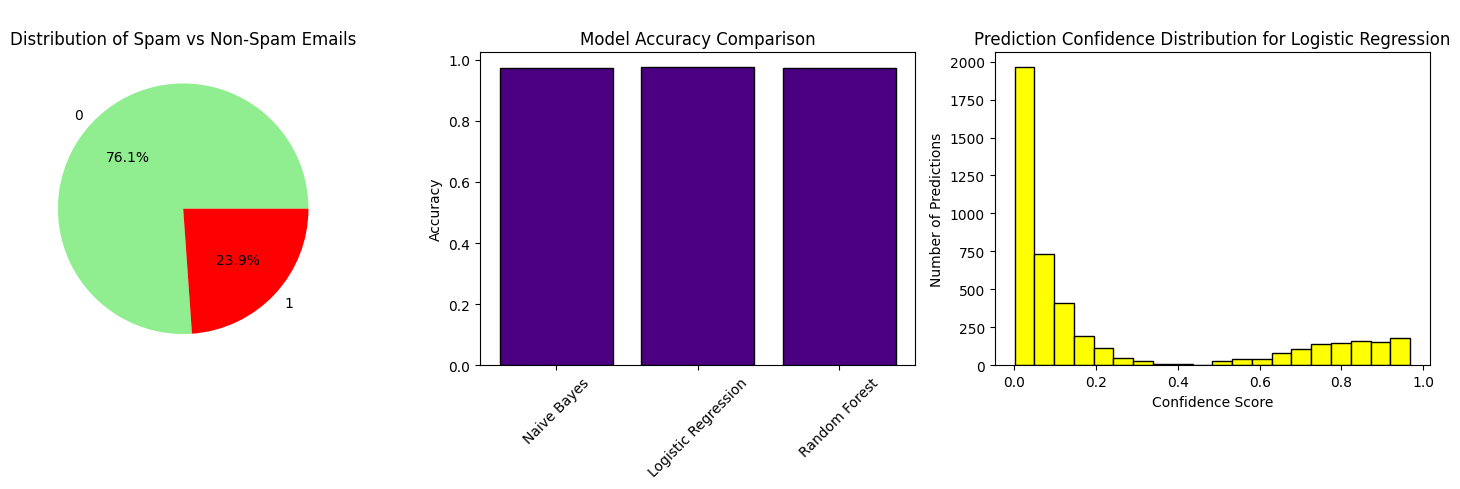


Confidence Distribution: 0-0.2      859
0.2-0.4     19
0.4-0.6     29
0.6-0.8     37
0.8-1.0    202
dtype: int64


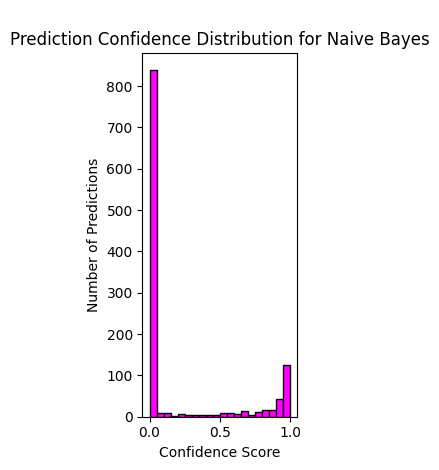


Confidence Distribution: 0-0.2      812
0.2-0.4     55
0.4-0.6     54
0.6-0.8     92
0.8-1.0    133
dtype: int64


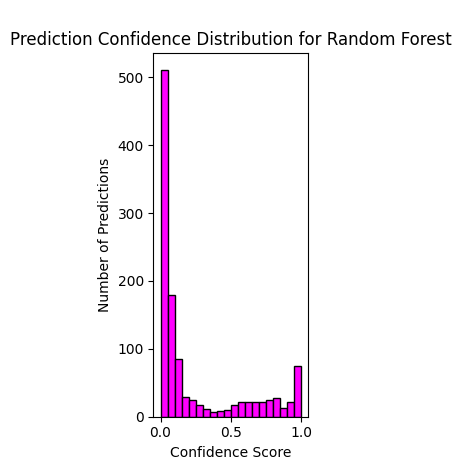

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

#Pie Graph
dist=pd.Series(y).value_counts()
print("Email Distribution: ",dist)
plt.figure(figsize=(15,5))
plt.subplot(131)
colors=["lightgreen","red"]
plt.pie(dist.values, labels=dist.index,autopct='%1.1f%%',colors=colors)
plt.title('Distribution of Spam vs Non-Spam Emails')

#Bar Graph
plt.subplot(132)
models=['Naive Bayes','Logistic Regression','Random Forest']
accuracies=[nb_accuracy,lr_accuracy,rf_accuracy]
plt.bar(models,accuracies,color='indigo',edgecolor='black')
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

#Histogram
def analyze_confidence(detector, X_test):
    confidences = detector.predict_proba(X_test)[:, 1]
    confidence_bins = pd.cut(confidences, bins=5, labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])
    confidence_dist = confidence_bins.value_counts()
    print("\nConfidence Distribution:", confidence_dist)
    return confidences

#Logistic Regression Model Histogram
confidence1 = analyze_confidence(lr_model, X_train)

plt.subplot(133)
plt.hist(confidence1, bins=20,color='yellow',edgecolor='black')
plt.title('\nPrediction Confidence Distribution for Logistic Regression')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Predictions')
plt.tight_layout()
plt.show()

#Naive Bayes Model Histogram
confidence2 = analyze_confidence(nb_model, X_test)
plt.subplot(133)
plt.hist(confidence2, bins=20,color='magenta',edgecolor='black')
plt.title('\nPrediction Confidence Distribution for Naive Bayes')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Predictions')
plt.tight_layout()
plt.show()

#Random Forest Model Histogram
confidence3 = analyze_confidence(rf_model, X_test)
plt.subplot(133)
plt.hist(confidence3, bins=20,color='magenta',edgecolor='black')
plt.title('\nPrediction Confidence Distribution for Random Forest')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Predictions')
plt.tight_layout()
plt.show()

In [11]:
import joblib

joblib.dump(lr_model, 'spam_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')
joblib.dump(nb_model, 'nb_model.joblib')
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']